In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [38]:
img = cv.imread('/Users/sehgal/Downloads/687px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
orgshape = img.shape

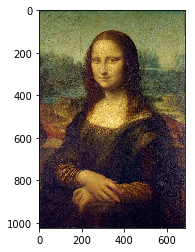

In [22]:
plt.imshow(img)
plt.show()

In [23]:
allPixels = img.reshape((-1,3))
print(allPixels.shape)

(703488, 3)


In [24]:
from sklearn.cluster import KMeans

In [67]:
dominantColors = 5
km = KMeans(n_clusters = dominantColors)

In [68]:
km.fit(allPixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
centers = km.cluster_centers_

In [70]:
centers = np.array(centers, dtype = 'uint8')

In [71]:
print(centers)

[[138 133  81]
 [ 25  14  30]
 [ 65  45  42]
 [198 171  94]
 [102  88  57]]


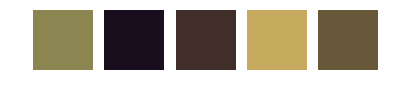

In [72]:
i = 1



plt.figure(0, figsize =(10,2))

colors = []

for eachColor in centers:
    plt.subplot(1,8,i)
    plt.axis("off")
    i = i+1
    
    colors.append(eachColor)
    
    #ColourSwatch
    
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:,:,:] = eachColor
    plt.imshow(a)
    
plt.show()

# Segmenting Original Image

In [73]:
newImg = np.zeros((1024*687,3),dtype = 'uint8')


In [74]:
colors

[array([138, 133,  81], dtype=uint8),
 array([25, 14, 30], dtype=uint8),
 array([65, 45, 42], dtype=uint8),
 array([198, 171,  94], dtype=uint8),
 array([102,  88,  57], dtype=uint8)]

In [75]:
km.labels_

array([0, 4, 4, ..., 4, 1, 0], dtype=int32)

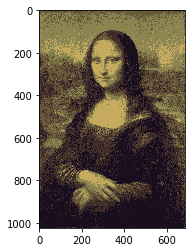

In [76]:
for ix in range(newImg.shape[0]):
    newImg[ix] = colors[km.labels_[ix]]
    
    
newImg = newImg.reshape((orgshape))
plt.imshow(newImg)
plt.show()